Importing packages

In [3]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

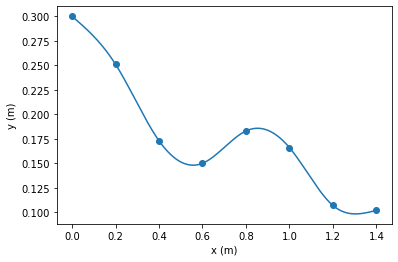

In [4]:
# OBS! OBS! Jeg oppgir alt i SI-enheter

#Festepunktene
xfast = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
xfast = xfast
#høyder = np.array([0.296, 0.223, 0.16, 0.187, 0.206, 0.198, 0.144, 0.153])
høyder = np.array([0.300, 0.251, 0.173, 0.150, 0.183, 0.166, 0.107, 0.102])
høyder = høyder

#Den bruker mange tredjegradspolynomer til å beskrive en bane som går gjennom festepunktene
cs = scipy.interpolate.CubicSpline(xfast, høyder, bc_type='natural')

#Definere x-koordinatene
xmin = 0.0
xmax = 1.401
dx = 0.001
x = np.arange(xmin, xmax, dx)

#Finne y-koordinatene ved hjelp av cs
y = cs(x)

plt.figure()
plt.scatter(xfast, høyder)
plt.plot(x, y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()


Hastigheten i sluttpunktet er 0.0 m/s
Kinetisk energi i sluttpunktet er 0.06021378 J


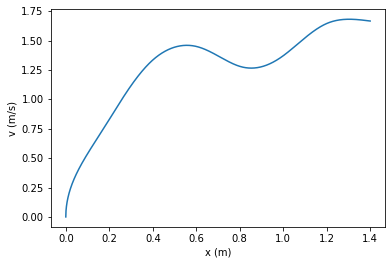

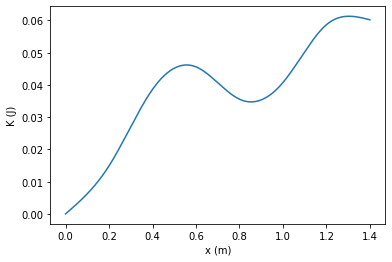

In [5]:

#Hastighet funksjon
def hastighet(x, x0=0.0, c=2/5):
    y = cs(x)
    y0 = cs(x0)
    v = np.sqrt((2*9.81*(y0-y))/(1+c))
    return v

#Kinetisk energi funksjon
def kinetic_energy(x, x0=0.0, c=2/5, m=0.031):
    K = m*hastighet(x, x0, c)**2*(1+c)/2
    return K

#Beregner hastighet
c = 2/5
x0 = 0
v = hastighet(x, x0, c)

plt.figure()
plt.plot(x, v)
plt.xlabel("x (m)")
plt.ylabel("v (m/s)")
plt.show()

print("Hastigheten i sluttpunktet er {} m/s".format(v[0]))

#Beregner kinetisk energi
K = kinetic_energy(x, x0)
plt.figure()
plt.plot(x, K)
plt.xlabel("x (m)")
plt.ylabel("K (J)")
plt.show()


print("Kinetisk energi i sluttpunktet er {} J".format(K[-1]))

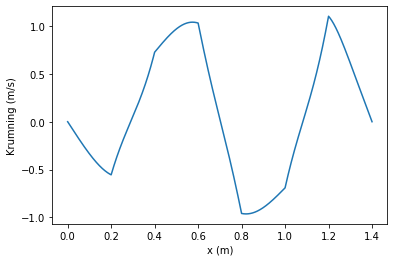

In [6]:
#Krumningsfunksjon
def krumning(x):
    y_derivert = cs(x, 1)
    y_dobbelt_derivert = cs(x,2)
    k = y_dobbelt_derivert/(1+y_derivert**2)**3/2
    return k

k = krumning(x)

plt.figure()
plt.plot(x, k)
plt.xlabel("x (m)")
plt.ylabel("Krumning (m/s)")
plt.show()

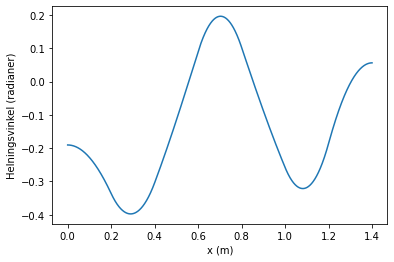

In [7]:
#Helningsvinkelfunksjon
def helningsvinkel(x):
    y_derivert = cs(x, 1)
    b = np.arctan(y_derivert)
    return b

b = helningsvinkel(x)

plt.figure()
plt.plot(x, b)
plt.xlabel("x (m)")
plt.ylabel("Helningsvinkel (radianer)")
plt.show()

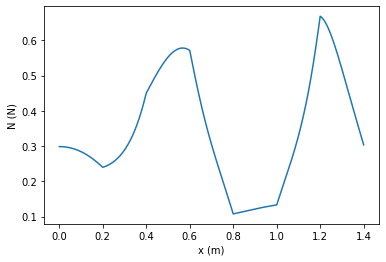

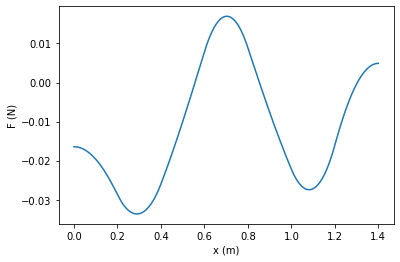

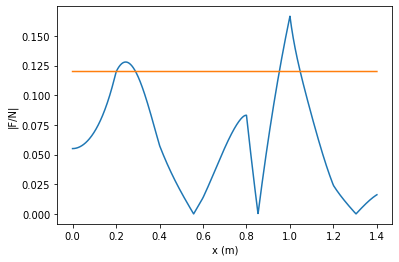

In [8]:
#Sentripetalakselrasjonsfunksjon
def a(x, x0=0.0, c=2/5):
    a = (2*9.81*(cs(x0)-cs(x))*cs(x,2))/((1+c)*(1+cs(x,1)**2)**3/2)
    return a

#Normalkraftfunksjon
def normal(x, x0=0.0, c=2/5, m=0.031):
    N = m*(9.81*np.cos(helningsvinkel(x))+a(x, x0, c))
    return N

#Friksjonskraft
def friction(x, c=2/5, m=0.031):
    f = c*m*9.81*np.sin(helningsvinkel(x))/(1+c)
    return f

N = normal(x)
F = friction(x)

F_over_N = F/N

plt.figure()
plt.plot(x, N)
plt.xlabel("x (m)")
plt.ylabel("N (N)")
plt.show()

plt.figure()
plt.plot(x, F)
plt.xlabel("x (m)")
plt.ylabel("F (N)")
plt.show()

plt.figure()
plt.plot(x, np.abs(F_over_N))
plt.plot(x, np.ones(len(x))*0.12)
plt.xlabel("x (m)")
plt.ylabel("|F/N|")
plt.show()

In [9]:
#Tidsutvikling

dx = 0.001
x_n = 0.0
x_n_pluss_en = x_n + dx
t = 0

for n in range(1, 1401):
    v_n = hastighet(x_n, xmin)
    v_n_pluss_en = hastighet(x_n_pluss_en)

    b_n = helningsvinkel(x_n)
    b_n_pluss_en = helningsvinkel(x_n_pluss_en)

    vx_n = v_n*np.cos(b_n)
    vx_n_pluss_en = v_n_pluss_en*np.cos(b_n_pluss_en)

    avg_v = 0.5*(vx_n+vx_n_pluss_en)

    dt = dx/avg_v
    t += dt

    x_n += dx
    x_n_pluss_en += dx

print("Total rulletid var {} s".format(t))

Total rulletid var 1.4473710946518599 s


In [10]:
import numpy as np
y = np.array([1, 2, 3]*3)
print(y*2)

[2 4 6 2 4 6 2 4 6]
